In [23]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data_merged.csv", sep=";")
print(EV)


# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Temp'] = EV['Temp'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Plus'] = EV['Plus'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')


#Remover as linhas com "Total Energy (kWh)" inferior a 1
EV = EV[EV['Total Energy (kWh)'] >= 1].reset_index(drop=True)

#Calcular Power 
EV['Power']= EV['Total Energy (kWh)'] / (EV['Duration (min)']/ 60)


# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])
# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()
# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))
# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')


# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}
charging_station = {'CAP_SON_MAI_00001': 1, 'CAP_SON_MAI_00002': 2, 'CAP_SON_MAI_00004': 3, 'CAP_SON_MAI_00010': 4, 'CAP_SON_MAI_00003': 5 }


EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)
EV['Charging Station'] = EV['Charging Station'].map(charging_station)


EV = EV[['Duration (min)','Total Energy (kWh)','Power','Period of Day', 'Day of Week', 'Season', 'Período Escolar', 'Charging Station','Month','Temp','Plus']]
print(EV)

             Start date           Stop date Network          Fleet report_ev  \
0    06/07/2022 | 13:52  06/07/2022 | 17:36    EVIO  Frota Capwatt  AA-99-AA   
1    06/15/2022 | 18:51  06/15/2022 | 18:57    EVIO  Frota Capwatt  AA-99-AA   
2    06/15/2022 | 15:08  06/15/2022 | 15:51    EVIO  Frota Capwatt  AA-99-AA   
3    06/15/2022 | 18:37  06/15/2022 | 18:49    EVIO  Frota Capwatt  AA-99-AA   
4    07/01/2022 | 18:44  07/01/2022 | 18:44    EVIO  Frota Capwatt  AA-99-AA   
..                  ...                 ...     ...            ...       ...   
112  05/24/2023 | 18:42  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA   
113  05/26/2023 | 18:51  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA   
114  05/30/2023 | 09:32  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA   
115  05/31/2023 | 13:46  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA   
116  05/31/2023 | 13:46  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA   

      Group        User   Charging Stat

<AxesSubplot:xlabel='Charging Station', ylabel='Power'>

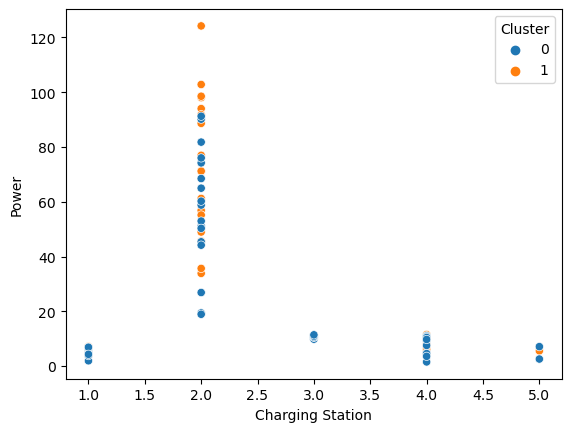

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalização dos dados
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(EV)

# Escolha do número de clusters 
num_clusters = 2

# Aplicação do K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
EV['Cluster'] = kmeans.fit_predict(X_kmeans)

sns.scatterplot(x='Charging Station', y='Power', hue = 'Cluster', data=EV)

Power: 0.49040528674396644
Temp: 0.24810357315041678
Day of Week: 0.04337317314978427
Plus: 0.046354272395694236
Period of Day: 0.10799909016016773
Month: 0.043948571177244045
Período Escolar: 0.0023881573879003704
Season: 0.01742787583482615


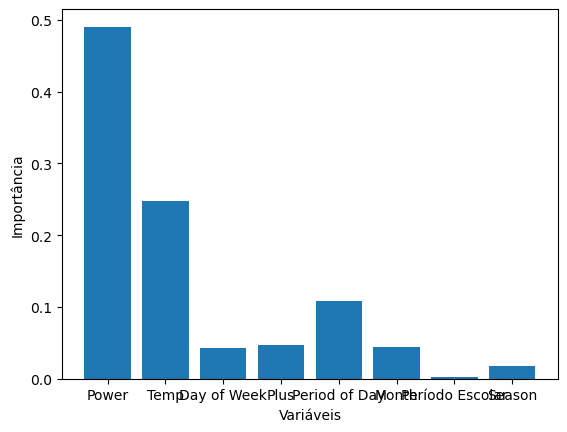

Mean Squared Error: 93.66826228510766
R-squared (R2): 0.349133607237184
[20.4244115  43.0000655  41.75308828 43.15709609 36.37331753 36.37572526
 31.80132924 34.91395897 41.83344765 35.83169025 29.78701606 38.16653445
 21.483345   26.09563868 14.76450017 27.81109685 43.771201   17.95739848
 31.61547644 29.80162374 34.5894781 ]


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Features e TARGET_VARIABLE
X = EV[['Power', 'Temp','Day of Week', 'Plus','Period of Day', 'Month', 'Período Escolar', 'Season']]
y = EV['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino  Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obter a importância das características
importancia_caracteristicas = model.feature_importances_

# Exibir a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exibir um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Power: 0.44946849248858756
Temp: 0.012036647512978612
Duration (min): 0.5384948599984337


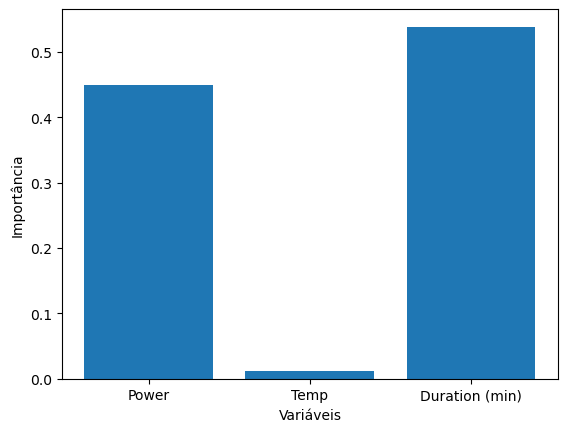

Mean Squared Error: 19.502605273691074
R-squared (R2): 0.8644835504119036
[27.54516409 45.4472257  27.87698198 48.56497788 44.23158383 10.29261913
 21.73391671 25.55316393 43.18079634 41.35473881 32.83208426 33.04321243
 31.59177006 20.11749087 11.93440781 33.34756273 50.45005197 21.66277016
 21.65922453 43.7853914  23.93002153]


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = EV[['Power', 'Temp','Period of Day', 'Duration (min)']]
y = EV['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino  Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obter a importância das características
importancia_caracteristicas = model.feature_importances_

# Exibir a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exibir um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecionar as 50 primeiras e últimas observações
X = EV[['Total Energy (kWh)']].head(50)
y = EV['Total Energy (kWh)'].tail(50)

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino  Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Mean Squared Error: 454.3468822057531
R-squared (R2): -1.0154078538638105
[20.04555909 20.04555909 24.8439016  46.96789698 24.8439016  20.04555909
 51.5697781  47.17263803 18.41968584 40.93094277]


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = EV[['Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
y = EV['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino  Gradient Boosting
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Mean Squared Error: 153.40064894173972
R-squared (R2): -0.06592483503411084
[24.94453657  9.97779484 20.84209101 35.68623173 46.00015758 24.72122295
 20.28624863 21.97403733 44.06038181 39.8398729  30.59518436 32.07144387
 32.86550761 19.19385698 33.1190975  30.49528406 47.7767465  36.99573846
 20.28624863 24.11632694 25.36553674]


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features e TARGET_VARIABLE
#X = EV[['Power', 'Temp','Day of Week', 'Plus','Period of Day', 'Month', 'Período Escolar', 'Season']]
#y = EV['Total Energy (kWh)']
       
# Selecionar as 50 primeiras e últimas observações
X = EV[['Total Energy (kWh)', 'Temp', 'Power']].head(50)
y = EV['Total Energy (kWh)'].tail(50)

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

Mean Squared Error (MSE): 500.014100336346
R-squared (R2): -1.2179801035900208
[41.22519445 37.70823012 32.52320086 24.15753245 37.94003656 36.75343062
 29.28157149 37.11753798 38.2582643  34.74325951]


In [28]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = EV[['Power', 'Temp','Day of Week', 'Plus','Period of Day', 'Month', 'Período Escolar', 'Season']]
y = EV['Total Energy (kWh)']

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados (é uma boa prática para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção do modelo de rede neural
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Camada de saída para uma tarefa de regressão
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# previsões no conjunto de teste
predictions = model.predict(X_test_scaled).flatten()

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')
print(predictions)

Epoch 1/100
2/2 - 0s - loss: 1082.6523 - val_loss: 1363.6190 - 365ms/epoch - 183ms/step
Epoch 2/100
2/2 - 0s - loss: 1069.5764 - val_loss: 1351.9775 - 28ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 1057.5093 - val_loss: 1340.4951 - 28ms/epoch - 14ms/step
Epoch 4/100
2/2 - 0s - loss: 1045.5579 - val_loss: 1329.1919 - 31ms/epoch - 15ms/step
Epoch 5/100
2/2 - 0s - loss: 1034.3719 - val_loss: 1317.9661 - 33ms/epoch - 17ms/step
Epoch 6/100
2/2 - 0s - loss: 1023.2706 - val_loss: 1307.0139 - 35ms/epoch - 18ms/step
Epoch 7/100
2/2 - 0s - loss: 1012.1868 - val_loss: 1295.8977 - 37ms/epoch - 18ms/step
Epoch 8/100
2/2 - 0s - loss: 1000.9747 - val_loss: 1284.6163 - 33ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 989.0775 - val_loss: 1272.9216 - 34ms/epoch - 17ms/step
Epoch 10/100
2/2 - 0s - loss: 976.9697 - val_loss: 1260.6580 - 34ms/epoch - 17ms/step
Epoch 11/100
2/2 - 0s - loss: 964.2316 - val_loss: 1247.6282 - 38ms/epoch - 19ms/step
Epoch 12/100
2/2 - 0s - loss: 949.7957 - val_loss: 12

2/2 - 0s - loss: 158.7725 - val_loss: 359.4637 - 28ms/epoch - 14ms/step
Epoch 98/100
2/2 - 0s - loss: 158.5397 - val_loss: 359.4413 - 27ms/epoch - 13ms/step
Epoch 99/100
2/2 - 0s - loss: 158.2527 - val_loss: 359.2140 - 27ms/epoch - 13ms/step
Epoch 100/100
2/2 - 0s - loss: 158.0359 - val_loss: 359.2263 - 37ms/epoch - 19ms/step
Mean Squared Error: 182.21391705200986
R-squared (R2): -0.26613766509128856
[26.188086 34.136345 49.403812 37.629063 35.070293 23.738577 25.937649
 24.808975 32.15182  17.440716 25.54872  35.007133 13.909266 27.4404
 32.93697  26.927158 23.61398  18.035753 23.437786 23.00277  22.173986]


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Features e TARGET_VARIABLE
X = EV[['Power', 'Temp','Day of Week', 'Plus','Period of Day', 'Month', 'Período Escolar', 'Season']]
y = EV['Total Energy (kWh)']

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo KNN para regressão
knn_model = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos conforme necessário
knn_model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions = knn_model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

Mean Squared Error (MSE): 152.19574416571427
R-squared (R2): -0.05755239376038124
[31.856  31.214  41.002  41.002  29.17   37.378  30.298  43.536  30.098
 33.324  33.542  32.734  25.586  36.628  24.4282 28.642  35.798  24.4282
 30.298  32.056  40.33  ]


         count       mean        std     min       25%     50%     75%    max
Cluster                                                                      
0         26.0  14.016538   8.753022   3.480   6.73250  12.130  20.190  35.95
1         28.0  42.567536   9.656164  10.811  41.35000  44.860  48.010  55.51
2         17.0  32.892941  10.564816   8.550  29.20000  34.800  39.860  48.61
3          8.0  33.498625   9.291014  13.040  31.91975  34.670  40.705  41.17
4         22.0  31.405000  10.790384  10.620  22.01250  31.645  41.890  49.44


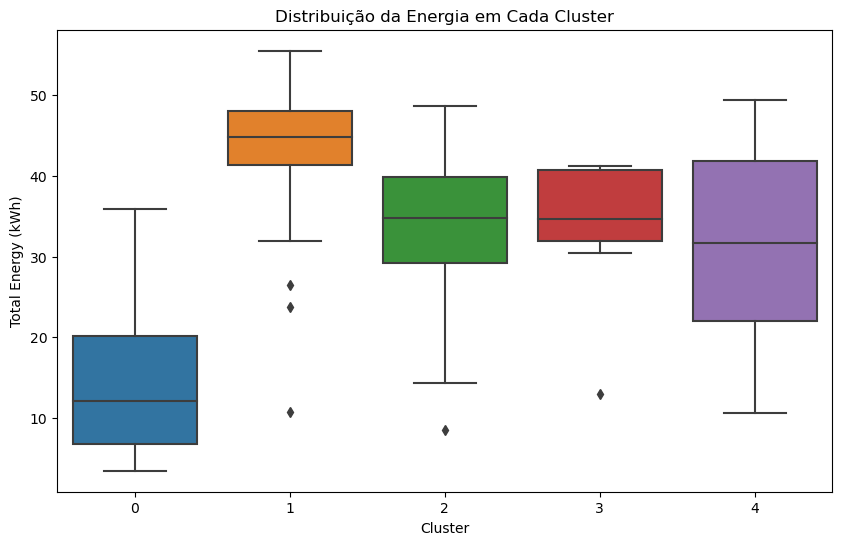

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalização dos dados
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(EV)

# Escolha do número de clusters 
num_clusters = 5

# Aplicação do K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
EV['Cluster'] = kmeans.fit_predict(X_kmeans)

# Obter estatísticas descritivas para cada cluster
cluster_stats = EV.groupby('Cluster')['Total Energy (kWh)'].describe()
print(cluster_stats)

# Crie um boxplot para visualizar a distribuição da energia em cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Energy (kWh)', data=EV)
plt.title('Distribuição da Energia em Cada Cluster')
plt.show()

In [60]:
# Defina os quantis desejados 
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# Agrupa por 'Cluster' e calcula os quantis para a coluna de energia
quantiles_by_cluster = EV.groupby('Cluster')['Total Energy (kWh)'].quantile(quantiles).unstack()

# Visualiza os quantis para cada cluster
#print(quantiles_by_cluster)
print()

# Calcula a distribuição percentual dos clusters para cada dia da semana
cluster_distribution = EV.groupby('Day of Week')['Cluster'].value_counts(normalize=True).unstack() * 100

# Visualiza a distribuição percentual dos clusters para cada dia da semana
#print(cluster_distribution)
print()

# Substitui todos os valores NaN por zero na tabela cluster_distribution
cluster_distribution = cluster_distribution.fillna(0)

# Imprime a nova tabela com NaNs substituídos por zero
#print(cluster_distribution)
#print()

# Inicializa um DataFrame para armazenar os resultados
weighted_quantiles = pd.DataFrame(index=cluster_distribution.index, columns=quantiles)

# Calcula a soma ponderada dos quantis para cada dia da semana
for quantile in quantiles:
    for cluster in cluster_distribution.columns:
        weighted_quantiles[quantile] = weighted_quantiles[quantile].fillna(0) + (cluster_distribution[cluster] / 100) * quantiles_by_cluster.loc[cluster, quantile]

# Imprime o DataFrame com as somas ponderadas dos quantis
#print(weighted_quantiles)

# Adiciona as colunas dos quantis ao DataFrame X
EV = pd.merge(EV, weighted_quantiles, left_on='Day of Week', right_index=True, suffixes=('', '_Quantile'))
print(EV)



    Duration (min)  Total Energy (kWh)       Power Period of Day  Day of Week  \
0          224.517              40.190   10.740389             2            2   
4          327.283              30.419    5.576642             2            2   
15          33.200              42.590   76.969880             1            2   
16         200.000              23.770    7.131000             2            2   
21          40.967              48.610   71.193888             2            2   
..             ...                 ...         ...           ...          ...   
92         286.133              53.170   11.149361             1            4   
18          22.267              36.380   98.028473             2            6   
82          29.350              44.630   91.236797             1            6   
83           8.150               3.650   26.871166             1            6   
29          20.167              34.560  102.821441             1            7   

    Season  Período Escol

     Temp  Plus  Day of Week  Season  Month  Período Escolar       0.05  \
0   18.25  0.00            2       3      6                2  16.292294   
4   20.00  0.05            2       3      7                1  16.292294   
15  20.25  0.45            2       4      9                2  16.292294   
16  20.25  0.45            2       4      9                2  16.292294   
21  19.75  0.00            2       4     10                2  16.292294   
..    ...   ...          ...     ...    ...              ...        ...   
92  14.75  0.00            4       2      4                2  16.848344   
18  22.22  0.00            6       4      9                2  10.060500   
82  12.75  0.00            6       2      3                2  10.060500   
83  12.75  0.00            6       2      3                2  10.060500   
29  16.50  1.18            7       4     10                2  13.182000   

         0.25        0.5       0.75       0.95  
0   26.426144  31.590385  37.600577  42.554250  
4

C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


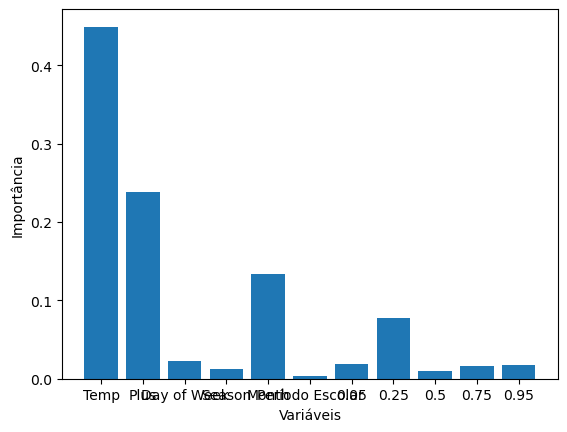

Mean Squared Error: 309.4733417305118
R-squared (R2): -0.7554877066181989
[30.60254579 43.71309388 26.39401223 36.33768412 29.81666931 18.4921103
 22.97684238 29.81666931  9.57269934 32.09106339 40.42276667 15.68697745
 22.99364743 39.05671806 29.17133521 21.71448068 21.78075923 51.11823139
  9.57269934 24.28021893 40.80824288]


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Features e TARGET_VARIABLE
X = EV[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
print(X)
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obtenha a importância das características
importancia_caracteristicas = model.feature_importances_

# Exiba a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exiba um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Mean Squared Error Scores for each fold: [195.267023   174.51349041 271.5420942  297.94005721 380.04096345]
Mean MSE: 263.8607256566905
Standard Deviation of MSE: 74.03550014048632
Power: 0.49040528674396644
Temp: 0.24810357315041678
Day of Week: 0.04337317314978427
Plus: 0.046354272395694236
Period of Day: 0.10799909016016773
Month: 0.043948571177244045
Período Escolar: 0.0023881573879003704
Season: 0.01742787583482615


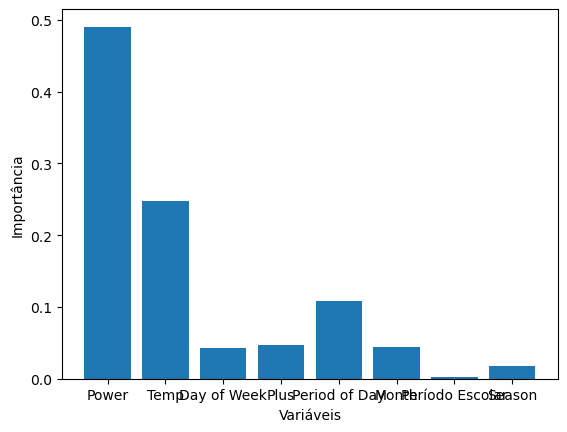

Mean Squared Error: 93.66826228510766
R-squared (R2): 0.349133607237184
[20.4244115  43.0000655  41.75308828 43.15709609 36.37331753 36.37572526
 31.80132924 34.91395897 41.83344765 35.83169025 29.78701606 38.16653445
 21.483345   26.09563868 14.76450017 27.81109685 43.771201   17.95739848
 31.61547644 29.80162374 34.5894781 ]


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = EV[['Power', 'Temp','Day of Week', 'Plus','Period of Day', 'Month', 'Período Escolar', 'Season']]
y = EV['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização do Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Realizar cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # cv=5 para 5-fold cross-validation

# Transformar os scores de erro quadrático médio para valores positivos
cv_mse_scores = -cv_scores

# Exibir os scores de cada fold
print("Mean Squared Error Scores for each fold:", cv_mse_scores)

# Exibir a média e desvio padrão dos scores
print("Mean MSE:", np.mean(cv_mse_scores))
print("Standard Deviation of MSE:", np.std(cv_mse_scores))

# Treino do modelo nos dados de treino
model.fit(X_train, y_train)

# Obter a importância das características
importancia_caracteristicas = model.feature_importances_

# Exibir a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exibir um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)